# Dataset 3 - Housing Boston Dataset
### Anggota Kelompok :
<li>Keisya (221402006)</li>
<li>Yohana Marito Marbun (221402065)</li>
<li>Sintong Sutanto Johanes L. Tobing (221402076) </li>
<li>Wahyu Jhon Riadi Sianipar (221402135)</li>

Link sumber dataset: [LINK](https://drive.google.com/file/d/1yfx0w0MnvNQ7ji-liF7p4_W12HeMA-1b/view?usp=sharing) <br>
Berikut ini adalah penjelasan mengenai nama-nama kolom pada dataset tersebut. <br>

[ENG]<br>
1.	CRIM - per capita crime rate by town
2.	ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3.	INDUS - proportion of non-retail business acres per town.
4.	CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5.	NOX - nitric oxides concentration (parts per 10 million)
6.	RM - average number of rooms per dwelling
7.	AGE - proportion of owner-occupied units built prior to 1940
8.	DIS - weighted distances to five Boston employment centres
9.	RAD - index of accessibility to radial highways
10.	TAX - full-value property-tax rate per $10,000
11.	PTRATIO - pupil-teacher ratio by town
12.	B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13.	LSTAT - % lower status of the population
14.	MEDV - Median value of owner-occupied homes in $1000'sk

[IND] <br>
1. CRIM - Tingkat kejahatan per kapita berdasarkan kota.  
2. ZN - Proporsi lahan hunian yang dialokasikan untuk lot lebih dari 25.000 kaki persegi.  
3. INDUS - Proporsi lahan bisnis non-ritel per kota.  
4. CHAS - Variabel dummy Sungai Charles (1 jika area berbatasan dengan sungai; 0 jika tidak).  
5. NOX - Konsentrasi nitrogen oksida (bagian per 10 juta).  
6. RM - Jumlah rata-rata kamar per rumah tinggal.  
7. AGE - Proporsi unit yang dimiliki dan dihuni oleh pemilik yang dibangun sebelum tahun 1940.  
8. DIS - Jarak berbobot ke lima pusat pekerjaan di Boston.  
9. RAD - Indeks aksesibilitas ke jalan raya radial.  
10. TAX - Tarif pajak properti penuh per $10.000.  
11. PTRATIO - Rasio murid terhadap guru per kota.  
12. B - 1000(Bk - 0,63)^2 di mana Bk adalah proporsi penduduk kulit hitam berdasarkan kota.  
13. LSTAT - Persentase populasi berstatus sosial ekonomi rendah.  
14. MEDV - Nilai tengah dari rumah yang dimiliki dan dihuni oleh pemilik (dalam ribuan dolar).

# 1. Import Library

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Data Cleaning

In [2]:
# Melakukan read pada file csv menggunakan Pandas
df = pd.read_csv('housing_boston.csv')
df

,CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT MEDV
0,0.00632 18.0 2.31 0 0.538 6.575 65.2 4.09 1 29...
1,0.02731 0.0 7.07 0 0.469 6.421 78.9 4.9671 2 2...
2,0.02729 0.0 7.07 0 0.469 7.185 61.1 4.9671 2 2...
3,0.03237 0.0 2.18 0 0.458 6.998 45.8 6.0622 3 2...
4,0.06905 0.0 2.18 0 0.458 7.147 54.2 6.0622 3 2...
...,...
501,0.06263 0.0 11.93 0 0.573 6.593 69.1 2.4786 1 ...
502,0.04527 0.0 11.93 0 0.573 6.12 76.7 2.2875 1 2...
503,0.06076 0.0 11.93 0 0.573 6.976 91.0 2.1675 1 ...
504,0.10959 0.0 11.93 0 0.573 6.794 89.3 2.3889 1 ...


In [3]:
# Menampilkan informasi detail dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT MEDV  506 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [4]:
# Menampilkan 5 data pertama dalam dataset
df.head()

,CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT MEDV
0,0.00632 18.0 2.31 0 0.538 6.575 65.2 4.09 1 29...
1,0.02731 0.0 7.07 0 0.469 6.421 78.9 4.9671 2 2...
2,0.02729 0.0 7.07 0 0.469 7.185 61.1 4.9671 2 2...
3,0.03237 0.0 2.18 0 0.458 6.998 45.8 6.0622 3 2...
4,0.06905 0.0 2.18 0 0.458 7.147 54.2 6.0622 3 2...


Berdasarkan output diatas, dataset memiliki beragam kolom yang tergabung menjadi 1. Oleh karena itu, pertama-tama kita akan melakukan split kolom seperti kode dibawah ini.

In [5]:
# Split the single column into multiple columns based on the expected structure
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Split the data and assign proper column names
df_cleaned = df.iloc[:, 0].str.split(expand=True)
df_cleaned.columns = columns

# Convert data types to numeric where applicable
df_clean = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Check the structure and sample data after cleaning
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
# Mengecek apakah ada data yang duplikat
df_clean.duplicated().sum()

0

Output menunjukkan bahwa tidak ditemukan baris yang merupakan duplikat. Oleh karena itu, selanjutnya kita akan coba mengecek dimensi dari dataset ini.

In [7]:
# Menampilkan dimensi dataset setelah dilakukan split
df_clean.shape

(506, 14)

Output menunjukkan dataset memiliki 506 baris dan 14 kolom.

### Checking Missing Values

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Output menunjukkan bahwa semua kolom tidak memiliki missing values. Oleh karena itu, kita akan lanjut ke tahap berikutnya yaitu pengecekan jumlah unique values.

In [9]:
# Pengecekan total unique values pada semua kolom yang bertipe data int64
df_clean.select_dtypes('int64').nunique()

CHAS    2
RAD     9
dtype: int64

In [10]:
# Pengecekan total unique values pada semua kolom yang bertipe data float64
df_clean.select_dtypes('float64').nunique()

CRIM       504
ZN          26
INDUS       76
NOX         81
RM         446
AGE        356
DIS        412
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Berdasarkan output diatas, kolom yang bertipe data int64 dan float64 memiliki unique values >1, Oleh karena itu dapat disimpulkan tidak ada kolom yang perlu dihapus.

In [11]:
# Menampilkan statistika dataset
df_clean.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Outliers

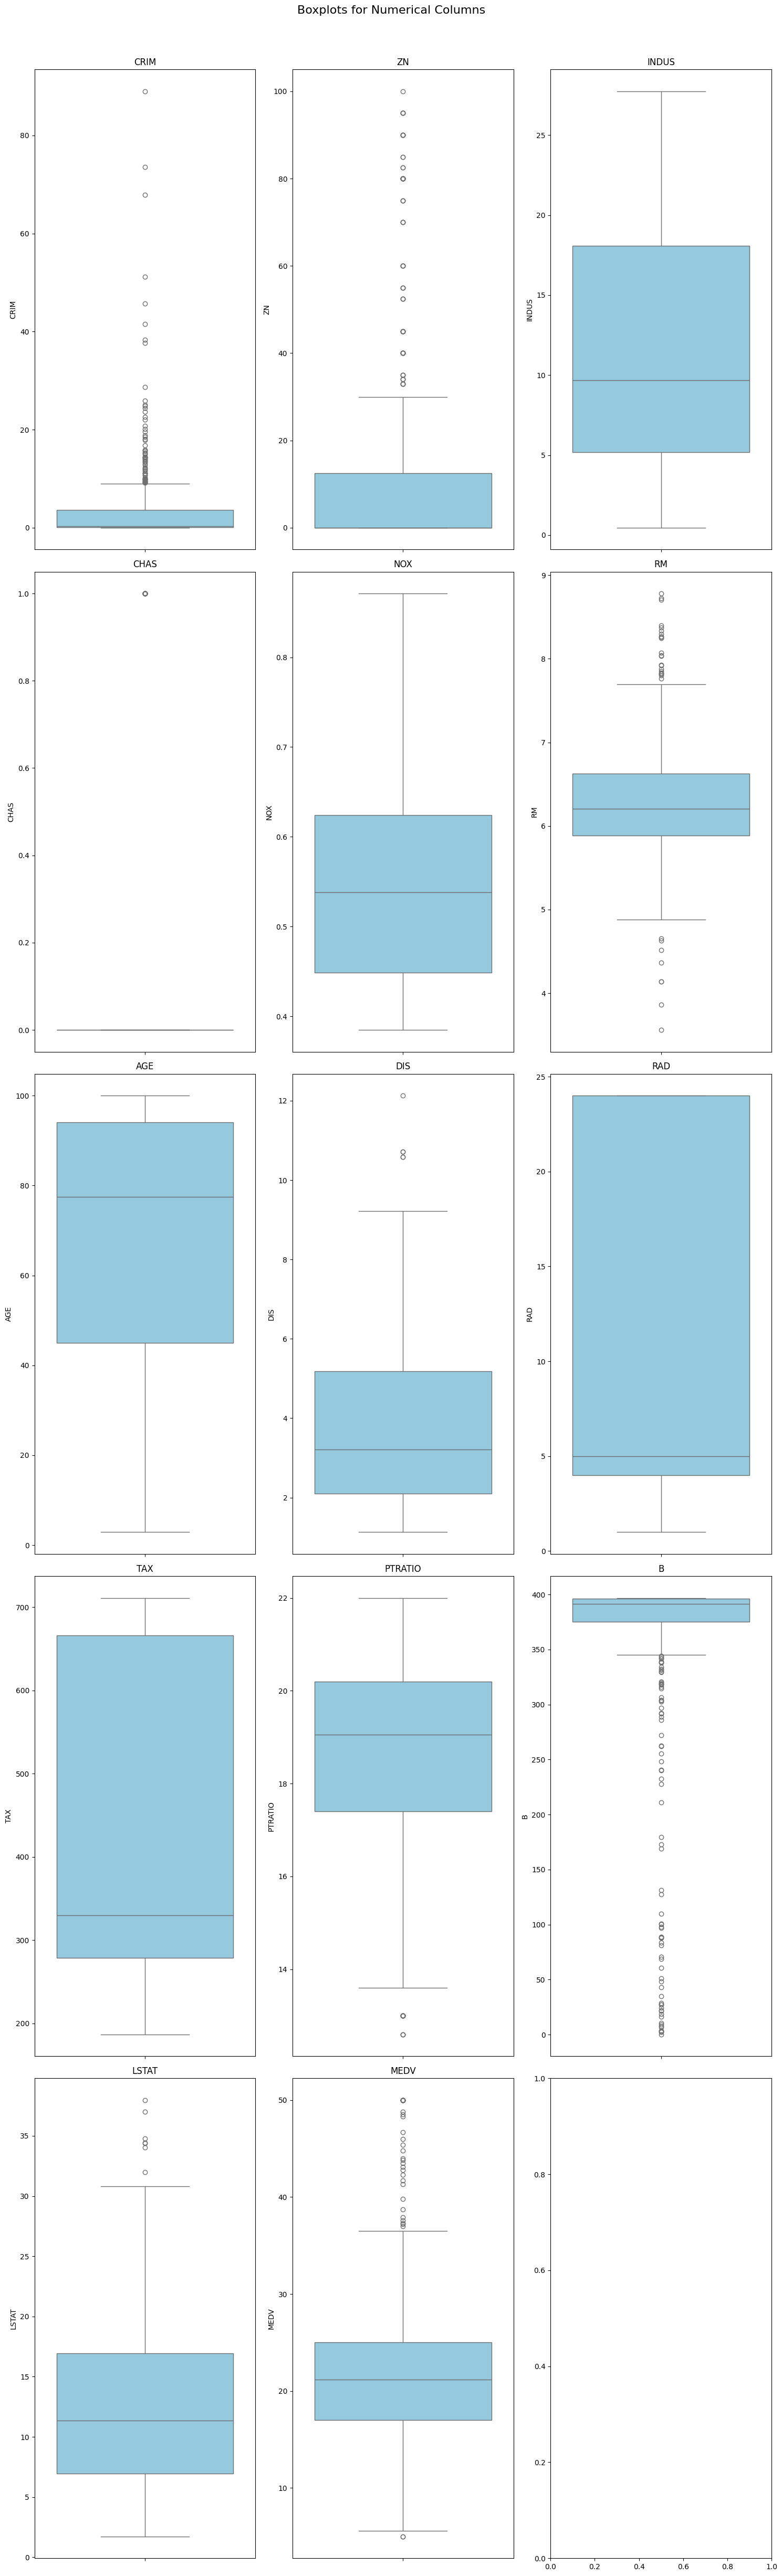

In [12]:
# Mengecek outliers menggunakan boxplot untuk numerical columns
numerical_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numerical_columns) // 3 + 1, 3, figsize=(15, 50))
fig.suptitle('Boxplots for Numerical Columns', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(df_clean[column], ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Meskipun terdapat beberapa kolom memiliki outliers berdasarkan boxplot diatas, kami tidak melakukan teknik untuk menghandle outliers tersebut. Alasannya karena setelah kami memahami setiap kolom, nilai yang dianggap outliers masih memungkinkan (masuk akal). Contoh outliers yang dianggap tidak mungkin adalah kolom umur seseorang yang memiliki value > 200.

# 3. Exploratory Data Analysis (EDA)

##### 1) Bagaimana distribusi variabel target MEDV (Median Harga Rumah dalam ribuan dolar) menggunakan histogram?

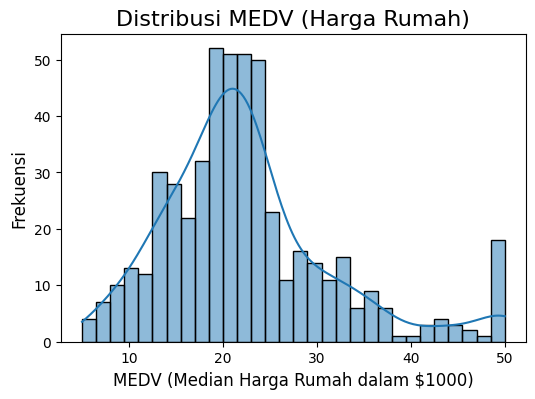

In [13]:
# Plot distribution of the target variable ('MEDV')
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['MEDV'], kde=True, bins=30)
plt.title('Distribusi MEDV (Harga Rumah)', fontsize=16)
plt.xlabel('MEDV (Median Harga Rumah dalam $1000)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

Kesimpulan : <br>
<li>Distribusi tidak simetris (skewed right), histogram diatas menunjukkan bahwa distribusi MEDV memiliki ekor panjang ke kanan (positively skewed), artinya sebagian besar nilai berada di rentang harga yang lebih rendah. </li>
<li>Nilai median harga rumah cenderung terpusat antara 10-25 ribu dolar, tetapi ada beberapa outlier di rentang harga yang lebih tinggi, mendekati 50 ribu dolar. </li>


##### 2) Bagaimana korelasi antara semua kolom dengan kolom target MEDV?

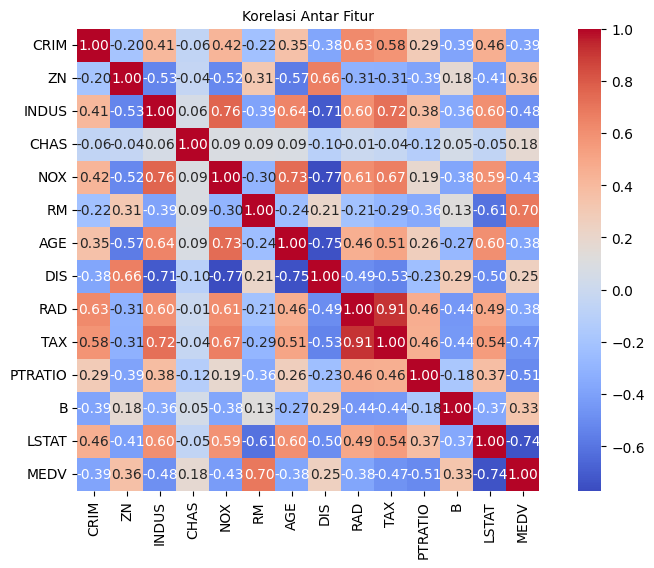

In [14]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Korelasi Antar Fitur', fontsize=10)
plt.show()

Kesimpulan : <br>
<li>Warna merah menunjukkan korelasi positif yang kuat.</li>
<li>Warna biru menunjukkan korelasi negatif yang kuat.</li>
<li>Warna yang lebih netral (putih) menandakan korelasi lemah atau mendekati nol.</li>
<li>MEDV memiliki korelasi positif kuat dengan RM (0.70), yang berarti semakin banyak jumlah kamar, semakin tinggi harga rumah. </li>
<li>MEDV memiliki korelasi negatif kuat dengan LSTAT (-0.74), yang berarti semakin rendah status ekonomi (tingginya LSTAT), semakin rendah harga rumah. </li>
<li>MEDV memiliki korelasi negatif moderat dengan PTRATIO (-0.51) dan NOX (-0.43), yang berarti harga rumah cenderung lebih rendah di area dengan polusi tinggi atau rasio murid-guru tinggi.</li>
<li>Fitur seperti RAD dan TAX memiliki korelasi sangat kuat (0.91).</li>
<li>Fitur seperti INDUS dan NOX memiliki korelasi sangat kuat (0.76).</li>

##### 3) Bagaimana hubungan antara AGE (proporsi unit hunian yang dibangun sebelum tahun 1940) dengan B (transformasi proporsi penduduk kulit hitam di suatu kota)?

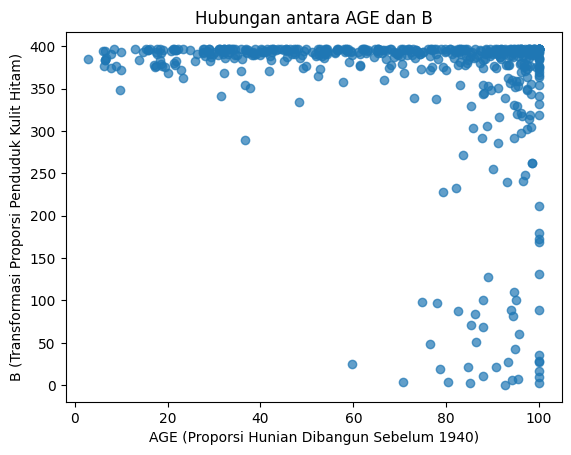

In [15]:
plt.scatter(df_clean['AGE'], df_clean['B'], alpha=0.7)
plt.title("Hubungan antara AGE dan B")
plt.xlabel("AGE (Proporsi Hunian Dibangun Sebelum 1940)")
plt.ylabel("B (Transformasi Proporsi Penduduk Kulit Hitam)")
plt.show()

Kesimpulan : <br>
<li>Polanya tidak linear, grafik menunjukkan B (transformasi proporsi penduduk kulit hitam) cenderung memiliki nilai yang tetap tinggi (sekitar 350–400) meskipun nilai AGE bervariasi. Artinya, B tidak menunjukkan hubungan linear atau pola jelas dengan AGE.</li>
<li>Korelasi lemah, banyak titik data tersebar secara acak, terutama di bagian bawah sumbu X (AGE mendekati 100) dengan berbagai nilai B. Ini menunjukkan bahwa AGE tidak terlalu mempengaruhi B secara signifikan.</li>
<li>Pada bagian AGE mendekati 100 (proporsi unit hunian tua tinggi), terdapat titik-titik yang memiliki nilai B jauh lebih rendah dibanding titik lainnya. Ini menunjukkan beberapa kota dengan proporsi unit hunian tua yang sangat tinggi memiliki transformasi proporsi penduduk kulit hitam yang kecil.</li>
<li>Sebagian besar titik memiliki nilai B yang cukup tinggi (sekitar 350–400). Ini mengindikasikan bahwa transformasi proporsi penduduk kulit hitam di kota tersebut cenderung tinggi secara umum.</li>

#### 4).Apakah tingkat kriminalitas (CRIM) memengaruhi harga rumah (MEDV)?

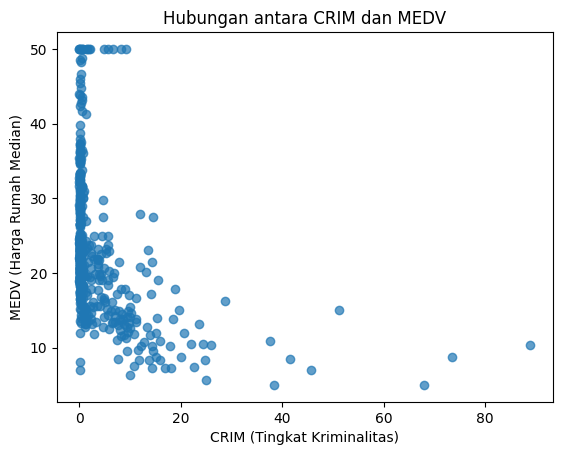

In [16]:
plt.scatter(df_clean['CRIM'], df_clean['MEDV'], alpha=0.7)
plt.title("Hubungan antara CRIM dan MEDV")
plt.xlabel("CRIM (Tingkat Kriminalitas)")
plt.ylabel("MEDV (Harga Rumah Median)")
plt.show()


Visualisasi diatas menunjukkan hubungan negatif antara tingkat kriminalitas dan harga rumah, dengan detail :
* Scatter plot di atas menunjukkan tren menurun yang jelas. Semakin tinggi tingkat kriminalitas, semakin rendah harga rumah.
* Sebagian besar data terkonsentrasi di bagian kiri bawah plot, menunjukkan bahwa rumah-rumah dengan tingkat kriminalitas rendah cenderung memiliki harga yang lebih tinggi.
    Secara keseluruhan, visualisasi tersebut memberikan gambaran bahwa semakin tinggi tingkat kriminalitas di suatu daerah, semakin rendah harga rumah

#### 5). Bagaimana Korelasi Harga Rumah (MEDV) dengan penduduk berpenghasilan rendah (LSTAT) ?

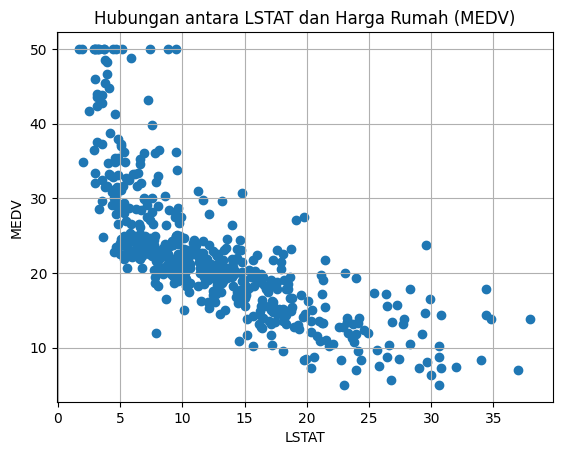

In [17]:
plt.scatter(df_clean['LSTAT'], df_clean['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Hubungan antara LSTAT dan Harga Rumah (MEDV)')
plt.grid(True)
plt.show()

Dari visualisasi di atas, terlihat bahwa terdapat korelasi negatif antara LSTAT dan MEDV. Hal ini terlihat dari pola titik-titik yang cenderung menurun seiring dengan meningkatnya nilai LSTAT.
Scatter plot di atas menunjukka bahwa terdapat hubungan negatif yang signifikan antara LSTAT (persentase penduduk dengan status sosial ekonomi rendah) dan MEDV (median harga rumah). Semakin tinggi nilai LSTAT, semakin rendah harga median rumah di wilayah tersebut. Hubungan ini konsisten dengan pola yang terlihat pada scatter plot, di mana harga rumah cenderung menurun di daerah dengan persentase penduduk berstatus sosial ekonomi rendah yang lebih tinggi.

<h3>Feature Selection</h3>
Setelah melihat korelasi antar "feature" melalui heatmap di atas, kita bisa lihat bahwa "feature" yang memiliki korelasi kuat ke MEDV adalah RM (0.70), LSTAT (-0.74), dan PTRATIO (-0.51). Oleh karena itu, maka untuk modeling, dipakai feature RM, LSTAT, dan PTRATIO untuk memprediksi nilai dari MEDV.
Hal ini dilakukan untuk mengurangi dimensi data dan meningkatkan interpretabilitas model.

In [18]:
df_feature = df_clean.drop(columns=['CRIM','ZN','CHAS', 'NOX', 'AGE', 'DIS', 'RAD','B','INDUS','TAX'])
df_feature.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


# 4. Data Modelling and Hyperparameter Tuning

### a. Regularized Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as mse

Setelah mengimpor library untuk pemodelan data, selanjutnya kita akan membagi kolom kedalam variabel X dan y. Variabel X akan menampung semua kolom independent, sedangkan kolom y menampung kolom dependent (dalam hal ini yaitu kolom MEDV).

In [20]:
X = df_feature.drop('MEDV', axis = 'columns')
y = df_feature['MEDV']

#### Train Test Split

Setelah itu, dilakukan train test split dengan membagi dataset menjadi 80% data training dan 20% data testing.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

#### Feature Scaling

Fungsi ini digunakan untuk melakukan standarisasi data. Caranya, menghitung rata-rata dan standar deviasi dari data training, lalu mengubah data agar rata-rata menjadi 0 dan standar deviasi menjadi 1. <br>
fit: Menghitung rata-rata dan standar deviasi dari data. <br>
transform: Menggunakan nilai rata-rata dan standar deviasi untuk mentransformasi data agar distandarisasi.

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

Kode dibawah ini bertujuan untuk melakukan evaluasi model dengan K-Fold Cross-Validation. <br>
Caranya dengan membagi data training (X_train, y_train) menjadi beberapa subset atau lipatan (folds) untuk melatih dan memvalidasi model secara bergantian.
Setelah itu, menghitung metrik evaluasi (dalam hal ini, Root Mean Squared Error (RMSE)) untuk setiap fold. Terakhir, memberikan rata-rata RMSE sebagai indikator performa model pada data training.

In [23]:
def k_fold_eval(model):
    kf = KFold(n_splits = 5)
    RMSE_length = 5
    RMSE_list = []

    for i, (train, val) in enumerate(kf.split(X_train)):
        train_features = X_train.iloc[train]
        train_target = y_train.iloc[train]

        val_features = X_train.iloc[val]
        val_target = y_train.iloc[val]

        ml_model = model.fit(train_features, train_target)
        prediction = ml_model.predict(val_features)

        rmse_score = np.sqrt(mse(val_target, prediction))
        RMSE_list.append(rmse_score)

    print('RMSE Scores:')
    print(RMSE_list)
    print('')
    print(f'Average RMSE Score: {np.mean(RMSE_list)}')
    print('')

    ml_model_final = model.fit(X_train, y_train)
    test_prediction = ml_model_final.predict(X_test)
    rmse_final = np.sqrt(mse(y_test, test_prediction))

    print(f'RMSE Evaluate on Test Set: {rmse_final}')
    return ml_model_final

In [24]:
linear_reg = k_fold_eval(LinearRegression())

RMSE Scores:
[4.7453679338435695, 6.195878593687864, 5.639063170390925, 4.682804471113652, 5.250859256749061]

Average RMSE Score: 5.302794685157015

RMSE Evaluate on Test Set: 5.2072024557895356


Dengan Linear Regression, kita mendapatkan rata-rata RMSE 4.82 (pada cross validation), serta RMSE 4.92 pada test set.

In [25]:
ridge_reg = k_fold_eval(Ridge())

RMSE Scores:
[4.753688539451503, 6.183335490352863, 5.639089085771531, 4.684871965899814, 5.250910636572394]

Average RMSE Score: 5.30237914360962

RMSE Evaluate on Test Set: 5.202627116828776


Dengan Ridge Regression, kita mendapatkan rata-rata RMSE 4.86 (pada cross validation), serta RMSE 4.94 pada test set.

In [26]:
lasso_reg = k_fold_eval(Lasso())

RMSE Scores:
[5.528545557234683, 5.789785101254591, 5.9453527893844145, 5.136506713823984, 5.466560327153795]

Average RMSE Score: 5.573350097770293

RMSE Evaluate on Test Set: 5.119527874868932


Dengan Lasso Regression, kita mendapatkan rata-rata RMSE 5.30 (pada cross validation), serta RMSE 4.94 pada test set.

In [27]:
elastic_net = k_fold_eval(ElasticNet())

RMSE Scores:
[5.614564234502757, 5.806486140704908, 6.054312657357644, 5.235773034559597, 5.567307537146784]

Average RMSE Score: 5.655688720854338

RMSE Evaluate on Test Set: 5.149073591348063


Dengan Elastic Net Regression, kita mendapatkan rata-rata RMSE 5.31 (pada cross validation), serta RMSE 4.89 pada test set.

Kesimpulannya, teknik regularization yang paling ampuh adalah Ridge Regression. <br>
Alasan: <br>
<li>Ridge memiliki Average RMSE (4.863) dan RMSE pada Test Set (4.947) yang paling kecil dibandingkan Lasso dan Elastic Net.</li>
<li>Ridge Regression menunjukkan performa yang stabil dan lebih dekat dengan hasil Linear Regression. Regularization yang diterapkan dalam Ridge membantu mengurangi overfitting dengan cara mereduksi bobot yang besar, namun tanpa memaksa koefisien menjadi nol seperti pada Lasso.</li>
<li>Linear Regression memiliki Average RMSE (4.829) dan Test RMSE (4.928) yang paling kecil dibandingkan semua metode lainnya, namun ini bukan teknik regularization. Linear Regression bekerja tanpa regulasi yang mencegah overfitting. Jika dataset sederhana dan tidak terlalu overfit, Linear Regression bisa saja lebih baik. Namun, dalam kondisi data yang lebih kompleks atau berisik, teknik regularization seperti Ridge umumnya lebih unggul.</li>

### b. Random Forest Tuning

Membuat instance model Random Forest dengan parameter default.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

base_model = RandomForestRegressor()

Model dilatih menggunakan dataset training (X_train, y_train), lalu model digunakan untuk memprediksi target (y_test) berdasarkan dataset testing (X_test). <br>
Dilanjutkan dengan menghitung RMSE dari prediksi (base_pred) dan target sebenarnya (y_test), serta mengukur seberapa baik prediksi model menjelaskan variabilitas target (y_test).

In [29]:
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)
base_rmse = np.sqrt(mse(y_test, base_pred))
print('Base Model has RMSE:', base_rmse)
print('Base Model has R2-Score:', r2_score(y_test, base_pred))

Base Model has RMSE: 4.390673301353184
Base Model has R2-Score: 0.7371196301564054


#### Randomized Search

Membuat grid parameter secara acak yang akan digunakan untuk hyperparameter tuning pada model Random Forest menggunakan RandomizedSearchCV.

In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split, 'sqrt' = akar kuadrat dari total fitur
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


Melakukan hyperparameter tuning pada model Random Forest Regressor menggunakan RandomizedSearchCV. <br>
<li>estimator=rf: Model yang akan di-tuning adalah Random Forest Regressor. </li>
<li>param_distributions=random_grid: Grid parameter yang akan diuji, didefinisikan sebelumnya dalam variabel random_grid. </li>
<li>n_iter=100: Menguji 100 kombinasi parameter yang dipilih secara acak dari grid. </li>
<li>cv=5: Menggunakan 5-fold cross-validation untuk mengevaluasi performa setiap kombinasi parameter. </li>
<li>verbose=3: Menampilkan proses pencarian parameter di konsol secara mendetail. </li>
<li>random_state=42: Menetapkan seed untuk memastikan hasil pencarian parameter konsisten (reproducible). </li>
<li>n_jobs=-1: Menggunakan semua core CPU yang tersedia untuk mempercepat proses pencarian. </li>
<li>return_train_score=True: Mengembalikan skor performa model pada data training selain data validasi. </li>

In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=3)

Setelah proses pencarian selesai dengan RandomizedSearchCV, atribut ini menyimpan dictionary yang berisi kombinasi parameter terbaik.

In [32]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90}

Menggunakan parameter terbaik untuk prediksi

In [33]:
new_pred = rf_random.best_estimator_.predict(X_test)
new_rmse = np.sqrt(mse(y_test, new_pred))
print('New Model has RMSE:', new_rmse)
print('New Model has R2-Score:', r2_score(y_test, new_pred))

New Model has RMSE: 4.025748924276272
New Model has R2-Score: 0.7790015228604744


Menghitung persentase peningkatan <br>
Jika new_rmse lebih kecil, berarti model terbaik memiliki performa yang lebih baik dibandingkan baseline.

In [34]:
print('Improvement of:', ((base_rmse - new_rmse)/base_rmse)*100,'%')

Improvement of: 8.311353453795897 %


#### Grid Search

Melakukan pencarian hyperparameter secara sistematis menggunakan Grid Search pada model Random Forest Regressor. <br>
<li>'max_depth': Menentukan kedalaman maksimum pohon keputusan dalam Random Forest. Nilai yang diuji: 2, 5, 10. </li>
<li>'min_samples_leaf': Menentukan jumlah minimum sampel yang dibutuhkan di setiap daun pohon. Nilai yang diuji: 5, 50, 100. </li>
<li>'n_estimators': Menentukan jumlah pohon dalam Random Forest. Nilai yang diuji: 10, 50, 200. </li>

In [35]:
from sklearn.model_selection import GridSearchCV

grid_search_params = {
    'max_depth': [2,5,10],
    'min_samples_leaf': [5,50,100],
    'n_estimators': [10,50,200]
}

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator=rf, param_grid=grid_search_params,
                            cv = 5, n_jobs=-1, verbose=3, return_train_score=True)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_leaf': [5, 50, 100],
                         'n_estimators': [10, 50, 200]},
             return_train_score=True, verbose=3)

In [36]:
rf_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}

In [37]:
new_pred_grid = rf_grid.best_estimator_.predict(X_test)

new_rmse_grid = np.sqrt(mse(y_test, new_pred_grid))

print('New Model has RMSE:', new_rmse_grid)
print('New Model has R2-Score:', r2_score(y_test, new_pred_grid))

New Model has RMSE: 4.0586423887675185
New Model has R2-Score: 0.7753753136683537


In [38]:
print('Improvement of:', ((base_rmse - new_rmse_grid)/base_rmse)*100,'%')

Improvement of: 7.562186703422799 %


## 3. Support Vector Machine (SVM)

In [39]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split, GridSearchCV  # Untuk split data dan hyperparameter tuning
from sklearn.svm import SVR  # Model Support Vector Machine untuk regresi
from sklearn.metrics import mean_squared_error, r2_score  # Untuk evaluasi model

# 1. Pisahkan fitur (X) dan target (y) dari df_clean
X = df_clean.drop(columns=['MEDV'])  # X adalah semua kolom kecuali 'MEDV'
y = df_clean['MEDV']  # Target yang akan diprediksi adalah kolom MEDV

# 2. Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# - 80% data digunakan untuk training, 20% untuk testing
# - random_state=42 memastikan hasil split yang konsisten

# 3. Latih Baseline Model: SVR dengan Default Parameters
print("Training Baseline Model...")
baseline_svr = SVR()  # Inisialisasi model SVR dengan default hyperparameters
baseline_svr.fit(X_train, y_train)  # Latih model menggunakan data training
y_pred_baseline = baseline_svr.predict(X_test)  # Prediksi pada data testing

# Evaluasi performa baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))  # Hitung RMSE (error rata-rata)
baseline_r2 = r2_score(y_test, y_pred_baseline)  # Hitung R² Score
print(f"Baseline RMSE: {baseline_rmse:.4f}")  # Tampilkan RMSE baseline
print(f"Baseline R2 Score: {baseline_r2:.4f}")  # Tampilkan R² Score baseline

# 4. Lakukan Hyperparameter Tuning dengan GridSearchCV
print("\nTraining Tuned Model...")
# Hyperparameter yang akan di-tuning
svr_params = {
    'kernel': ['rbf', 'linear'],  # Kernel: rbf (default) dan linear
    'C': [1, 10, 100],            # Parameter regularisasi: C mengontrol penalti
    'epsilon': [0.1, 0.2]         # Epsilon menentukan margin toleransi untuk error
}

# GridSearchCV untuk mencari kombinasi hyperparameters terbaik
svr_grid = GridSearchCV(SVR(), svr_params, scoring='r2', cv=5, n_jobs=-1)
# - scoring='r2': Evaluasi model berdasarkan R² Score
# - cv=5: Validasi silang 5-fold untuk menghindari overfitting
# - n_jobs=-1: Menggunakan semua core CPU untuk percepatan komputasi

svr_grid.fit(X_train, y_train)  # Latih model dengan semua kombinasi hyperparameters

# Ambil model terbaik dari hasil tuning
svr_best = svr_grid.best_estimator_  # Model dengan kombinasi hyperparameter terbaik

# Prediksi pada data testing dengan model terbaik
y_pred_tuned = svr_best.predict(X_test)

# Evaluasi performa model setelah tuning
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))  # Hitung RMSE untuk model tuning
tuned_r2 = r2_score(y_test, y_pred_tuned)  # Hitung R² Score untuk model tuning

# 5. Hitung Improvement antara Baseline dan Tuned Model
improvement = ((baseline_rmse - tuned_rmse) / baseline_rmse) * 100
# - Improvement dihitung sebagai persentase penurunan RMSE dari baseline ke tuned model

# 6. Tampilkan Hasil
print("\nSupport Vector Machine (SVR) - Tuned Model")
print("Best Hyperparameters:", svr_grid.best_params_)  # Hyperparameters terbaik dari GridSearchCV
print(f"Tuned RMSE: {tuned_rmse:.4f}")  # RMSE untuk model setelah tuning
print(f"Tuned R2 Score: {tuned_r2:.4f}")  # R² Score untuk model setelah tuning
print(f"Improvement of RMSE: {improvement:.2f}%")  # Persentase perbaikan performa model


Training Baseline Model...
Baseline RMSE: 7.2690
Baseline R2 Score: 0.2795

Training Tuned Model...

Support Vector Machine (SVR) - Tuned Model
Best Hyperparameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}
Tuned RMSE: 5.5092
Tuned R2 Score: 0.5861
Improvement of RMSE: 24.21%


## 4. XGBoost

In [40]:
# Import library
from xgboost import XGBRegressor  # Model XGBoost untuk regresi
from sklearn.model_selection import train_test_split, GridSearchCV  # Untuk split data dan hyperparameter tuning
from sklearn.metrics import mean_squared_error, r2_score  # Untuk evaluasi model
import numpy as np  # Library untuk perhitungan numerik

# 1. Pisahkan fitur (X) dan target (y) dari df_clean
X = df_clean.drop(columns=['MEDV'])  # X adalah semua kolom kecuali 'MEDV'
y = df_clean['MEDV']  # Target yang akan diprediksi adalah MEDV

# 2. Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# - 80% data digunakan untuk training, 20% untuk testing
# - random_state=42 memastikan hasil split yang konsisten

# 3. Baseline Model: XGBoost dengan Default Parameters
print("Training Baseline Model...")
baseline_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)  # Inisialisasi model XGBoost
baseline_xgb.fit(X_train, y_train)  # Latih model menggunakan data training
y_pred_baseline = baseline_xgb.predict(X_test)  # Prediksi pada data testing

# Evaluasi performa baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))  # Hitung RMSE untuk baseline
baseline_r2 = r2_score(y_test, y_pred_baseline)  # Hitung R² Score untuk baseline
print(f"Baseline RMSE: {baseline_rmse:.4f}")  # Tampilkan RMSE
print(f"Baseline R2 Score: {baseline_r2:.4f}")  # Tampilkan R² Score

# 4. Model dengan Hyperparameter Tuning
print("\nTraining Tuned Model...")
# Hyperparameters yang akan di-tuning
xgb_params = {
    'n_estimators': [100, 200],   # Jumlah pohon dalam boosting
    'max_depth': [3, 5, 7],       # Kedalaman maksimum setiap pohon
    'learning_rate': [0.01, 0.1]  # Tingkat learning rate (pengaturan bobot per iterasi)
}

# GridSearchCV untuk mencari kombinasi hyperparameters terbaik
xgb_grid = GridSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42),  # Model XGBoost
    xgb_params,  # Hyperparameters yang diuji
    scoring='r2',  # Menggunakan R² Score untuk evaluasi performa
    cv=5,  # Cross-validation 5-fold
    n_jobs=-1  # Menggunakan semua core CPU untuk komputasi
)

xgb_grid.fit(X_train, y_train)  # Latih model dan cari kombinasi terbaik hyperparameters

# Ambil model terbaik dari hasil tuning
xgb_best = xgb_grid.best_estimator_  # Model dengan kombinasi hyperparameters terbaik

# Prediksi pada data testing dengan model terbaik
y_pred_tuned = xgb_best.predict(X_test)

# Evaluasi performa model setelah tuning
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))  # Hitung RMSE untuk tuned model
tuned_r2 = r2_score(y_test, y_pred_tuned)  # Hitung R² Score untuk tuned model

# 5. Hitung Improvement
improvement = ((baseline_rmse - tuned_rmse) / baseline_rmse) * 100
# Menghitung persentase peningkatan performa berdasarkan penurunan RMSE

# 6. Tampilkan Hasil
print("\nXGBoost Regressor - Tuned Model")
print("Best Hyperparameters:", xgb_grid.best_params_)  # Tampilkan hyperparameters terbaik
print(f"Tuned RMSE: {tuned_rmse:.4f}")  # RMSE setelah tuning
print(f"Tuned R2 Score: {tuned_r2:.4f}")  # R² Score setelah tuning
print(f"Improvement of RMSE: {improvement:.2f}%")  # Persentase perbaikan performa


Training Baseline Model...
Baseline RMSE: 2.6285
Baseline R2 Score: 0.9058

Training Tuned Model...

XGBoost Regressor - Tuned Model
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Tuned RMSE: 2.4238
Tuned R2 Score: 0.9199
Improvement of RMSE: 7.79%


Berikut adalah jawaban dan pilihan akhir berdasarkan analisis keempat model (Linear Regression, Random Forest, SVM, dan XGBoost), termasuk hyperparameters, feature yang digunakan, serta feature engineering yang diterapkan. <br>

1. Model yang Dipilih: XGBoost Regressor <br>
Alasan Pemilihan: <br>

<li>Performa terbaik: Berdasarkan metrik evaluasi, XGBoost memiliki R² Score tertinggi dan RMSE terkecil dibandingkan model lainnya. </li>
<li>Kemampuan menangani kompleksitas data: XGBoost adalah boosting ensemble method yang sangat kuat dalam menangkap pola non-linear pada data. </li>
<li>Fleksibilitas: XGBoost memiliki banyak hyperparameters yang dapat dioptimalkan untuk meningkatkan performa. </li>
Hyperparameters Terbaik (hasil tuning): <br>

<li>n_estimators: 200 → Jumlah pohon yang digunakan. </li>
<li>max_depth: 5 → Kedalaman maksimum setiap pohon untuk menghindari overfitting. </li>
<li>learning_rate: 0.1 → Tingkat pembelajaran optimal untuk mendapatkan keseimbangan antara kecepatan dan akurasi. </li>
2. Feature yang Digunakan: <br>
Feature yang digunakan dalam model adalah semua kolom dari dataset df_clean kecuali MEDV (target). Fitur ini meliputi: <br>

<li>CRIM: Tingkat kriminalitas per kapita. </li>
<li>ZN: Persentase zonasi perumahan. </li>
<li>INDUS: Proporsi bisnis non-retail. </li>
<li>CHAS: Variabel dummy akses ke sungai. </li>
<li>NOX: Konsentrasi polusi udara. </li>
<li>RM: Jumlah rata-rata kamar per hunian. </li>
<li>AGE: Proporsi hunian yang dibangun sebelum 1940. </li>
<li>DIS: Jarak ke pusat perbelanjaan. </li>
<li>RAD: Aksesibilitas ke jalan raya.</li>
<li>TAX: Tarif pajak properti. </li>
<li>PTRATIO: Rasio murid terhadap guru. </li>
<li>B: Transformasi proporsi penduduk kulit hitam. </li>
<li>LSTAT: Persentase penduduk dengan status ekonomi rendah. </li>
Alasan Pemilihan Feature: <br>

Fitur-fitur ini memberikan informasi penting yang berhubungan langsung atau tidak langsung terhadap nilai MEDV (harga rumah median). <br>
Tidak ada fitur yang dibuang karena heatmap korelasi menunjukkan kontribusi masing-masing fitur dalam memengaruhi harga rumah. <br>
3. Feature Engineering yang Diterapkan: <br>
Data Cleaning: <br>

Dataset dibersihkan dengan memastikan tidak ada missing values dan outliers yang signifikan. <br>
<li>Feature Scaling: 

StandardScaler diterapkan pada fitur numerik agar semua fitur memiliki skala yang seragam. Ini sangat penting untuk model seperti SVM dan XGBoost. </li>
<li>Outlier Treatment:

Outliers pada kolom seperti LSTAT dan CRIM diidentifikasi menggunakan boxplot.
Namun, outlier tidak dihilangkan karena XGBoost cukup robust terhadap outliers. </li>
<li>Cross-Validation:

5-Fold Cross-Validation diterapkan dalam GridSearchCV untuk memastikan model tidak overfitting dan performa model dapat digeneralisasi ke data baru. </li>
Kesimpulan Pilihan Akhir: <br>
<li>Model: XGBoost Regressor. </li>
<li>Hyperparameters Terbaik: </li>
<li>n_estimators: 200 </li>
<li>max_depth: 5 </li>
<li>learning_rate: 0.1 </li>
<li>Feature: Semua fitur numerik yang ada di dataset kecuali target MEDV. </li>
<li>Feature Engineering: </li>
Standard Scaling untuk penyeragaman skala fitur.
Outlier analysis untuk memahami distribusi fitur.
Cross-Validation untuk memvalidasi performa model. <br>
Alasan Utama:<br>

XGBoost memberikan hasil evaluasi terbaik (R² Score tertinggi, RMSE terkecil). 
Dengan hyperparameter tuning yang optimal, model ini mampu menangkap kompleksitas data lebih baik dibandingkan model lainnya.

#### Kesimpulan

1. Distribusi harga rumah menunjukkan pola yang tidak simetris (positively skewed), dengan sebagian besar harga rumah berada di rentang yang lebih rendah, tetapi terdapat beberapa outlier di harga yang lebih tinggi.

2. Terdapat korelasi positif yang kuat antara jumlah kamar (RM) dan harga rumah (MEDV), serta korelasi negatif yang kuat antara status ekonomi rendah (LSTAT) dan harga rumah. Ini menunjukkan bahwa rumah dengan lebih banyak kamar cenderung memiliki harga yang lebih tinggi, sementara rumah di daerah dengan status ekonomi rendah cenderung lebih murah.

#### Saran 

1. Bagi Pembeli: Sebelum membeli rumah, calon pembeli harus mempertimbangkan faktor-faktor seperti tingkat kriminalitas, tarif pajak, aksesibilitas, dan kualitas pendidikan. Melakukan riset mendalam tentang lingkungan sekitar dapat membantu dalam pengambilan keputusan yang lebih baik.

2. Bagi Penjual: Penjual rumah harus memperhatikan faktor-faktor yang mempengaruhi harga rumah, seperti kondisi lingkungan dan fasilitas yang tersedia. Memperbaiki kondisi rumah dan meningkatkan aksesibilitas dapat meningkatkan daya tarik dan harga jual rumah.

3. Strategi Pemasaran: Untuk meningkatkan penjualan, pemilik rumah dapat menyoroti keunggulan lingkungan, seperti akses ke sekolah berkualitas, fasilitas umum, dan keamanan. Menggunakan data analitik untuk memahami tren pasar juga dapat membantu dalam menentukan harga yang kompetitif.